In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# ! wget https://raw.githubusercontent.com/deeplearning-itba/12-RNN/master/RNN_utils.py

In [6]:
! wget https://raw.githubusercontent.com/deeplearning-itba/12-RNN/master/federico-garcia-lorca/bodas_de_sangre.txt

--2020-10-15 13:36:07--  https://raw.githubusercontent.com/deeplearning-itba/12-RNN/master/federico-garcia-lorca/bodas_de_sangre.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.216.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.216.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69219 (68K) [text/plain]
Saving to: ‘bodas_de_sangre.txt’

bodas_de_sangre.txt 100%[===================>]  67.60K  --.-KB/s    in 0.03s   

2020-10-15 13:36:08 (2.06 MB/s) - ‘bodas_de_sangre.txt’ saved [69219/69219]



In [7]:
from RNN_utils import window_transform_text, encode_io_pairs, get_deep_rnn

# Abro archivo de texto con obra e imporimo los primeros 1000 caracteres

In [8]:
text = open('bodas_de_sangre.txt').read()
number_of_chars = len(text)
all_chars = sorted(set(text))
print('Cantidad de caracteres: ' + str(number_of_chars))
print('Cantidad de caracteres unicos: ' + str(len(all_chars)))
print(all_chars)
print('------------------------------------------------------')
print(text[:1000])

Cantidad de caracteres: 67561
Cantidad de caracteres unicos: 71
['\n', ' ', '!', '(', ')', ',', '.', '1', '2', '3', '9', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'x', 'y', 'z', '¡', '¿', 'É', 'Ñ', 'á', 'é', 'í', 'ñ', 'ó', 'ú']
------------------------------------------------------
BODAS DE SANGRE(1933)

Poema trágico en tres actos y siete cuadros

Personajes
 
Madre
Criada
Leonardo
Mozos
Novia
Vecina
Novio
Leñadores
Suegra
Muchachas
Padre de la novia
Mozos
Mujer de Leonardo
Luna
Muerte (como mendiga)

Acto primero

CUADRO PRIMERO

Habitación pintada de amarillo.

NOVIO: (Entrando) Madre.

MADRE: ¿Que?

NOVIO:Me voy.

MADRE: ¿Adónde?

NOVIO:A la viña. (Va a salir)

MADRE: Espera.

NOVIO:¿Quieres algo?

MADRE: Hijo, el almuerzo.

NOVIO: Déjalo. Comeré uvas. Dame la navaja.

MADRE: ¿Para qué?

NOVI

In [9]:
chars = set(text)
len(chars)

71

# Analisis de la frecuencia de los caracteres

In [10]:
from collections import Counter
Counter(text).most_common()

[(' ', 10351),
 ('a', 5847),
 ('e', 5543),
 ('o', 4129),
 ('s', 3118),
 ('r', 2911),
 ('n', 2891),
 ('l', 2523),
 ('\n', 2423),
 ('i', 1991),
 ('u', 1984),
 ('d', 1874),
 ('t', 1623),
 ('c', 1391),
 ('.', 1369),
 ('m', 1266),
 ('A', 1033),
 (':', 888),
 ('p', 832),
 ('E', 692),
 ('O', 624),
 ('b', 599),
 ('v', 585),
 ('q', 583),
 ('D', 545),
 ('N', 539),
 ('y', 536),
 ('h', 524),
 ('R', 515),
 ('g', 498),
 (',', 465),
 ('I', 399),
 ('M', 398),
 ('V', 366),
 ('C', 351),
 ('(', 329),
 (')', 329),
 ('j', 328),
 ('L', 308),
 ('!', 282),
 ('¡', 280),
 ('í', 275),
 ('á', 252),
 ('é', 249),
 ('?', 237),
 ('¿', 235),
 ('S', 226),
 ('P', 226),
 ('U', 193),
 ('z', 186),
 ('f', 172),
 ('H', 158),
 ('ñ', 136),
 ('Q', 125),
 ('Y', 123),
 ('ó', 111),
 ('T', 109),
 ('G', 68),
 ('J', 66),
 ('1', 63),
 ('Ñ', 58),
 ('ú', 57),
 (';', 39),
 ('2', 36),
 ('B', 21),
 ('Z', 21),
 ('3', 20),
 ('F', 20),
 ('x', 11),
 ('É', 5),
 ('9', 1)]

# Veo ejemplos en train de como queda Entrada / Salida

In [11]:
import numpy as np

In [12]:
def create_dataset(text, window = 100):
  inputs = []
  outputs = []
  
  for i in range(len(text)-window):
    inputs.append(text[i:i+window])
    outputs.append(text[i+1:i+window+1])
  return inputs, outputs

In [13]:
def encode_text(inputs,chars, window_size):
    num_chars = len(chars)
    chars_to_indices = dict((c, i) for i, c in enumerate(chars))
    # cut up text into character input/output pairs
    
    # create empty vessels for one-hot encoded input/output
    X = np.zeros((len(inputs), window_size, num_chars), dtype=np.bool)
    
    # loop over inputs/outputs and tranform and store in X/y
    for i, sentence in enumerate(inputs):
        for t, char in enumerate(sentence):
            if char not in chars_to_indices:
                char = ' '
            X[i, t, chars_to_indices[char]] = 1
    return X

In [14]:
window_size = 100
X_, y_ = create_dataset(text, window_size)
X = encode_text(X_, chars, window_size)
y = encode_text(y_, chars, window_size)

In [15]:
print('ENTRADA:')
print(X_[-1])
print('----------------')
print('SALIDA:')
print(y_[-1])
print('----------------')

ENTRADA:
o
donde tiembla enmarañada
la oscura raíz del grito.
(Las vecinas, arrodilladas en el suelo, lloran.
----------------
SALIDA:

donde tiembla enmarañada
la oscura raíz del grito.
(Las vecinas, arrodilladas en el suelo, lloran.)
----------------


In [16]:
X.shape, y.shape

((67461, 100, 71), (67461, 100, 71))

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, shuffle=False)

## Por que shuffle va en TRUE?? ##

In [18]:
chars_to_indices = dict((c, i) for i, c in enumerate(chars))
indices_to_chars = dict((i, c) for i, c in enumerate(chars))
print(chars_to_indices)

{'R': 0, 'g': 1, 'l': 2, 'Ñ': 3, 'i': 4, ' ': 5, ';': 6, 'ú': 7, 'm': 8, 'y': 9, 'N': 10, 'f': 11, 'B': 12, 'P': 13, 'ñ': 14, 'r': 15, '¿': 16, ',': 17, 'ó': 18, 'C': 19, 'p': 20, 'F': 21, 'M': 22, 'T': 23, 'o': 24, 'b': 25, 't': 26, '(': 27, 'x': 28, '9': 29, '\n': 30, 'v': 31, 'h': 32, 'H': 33, '?': 34, ':': 35, 'a': 36, 'A': 37, 'É': 38, 'n': 39, 'I': 40, 'Y': 41, 'é': 42, 'G': 43, 'Q': 44, 's': 45, 'z': 46, 'D': 47, 'U': 48, 'í': 49, '¡': 50, '!': 51, '2': 52, 'á': 53, 'L': 54, 'J': 55, 'S': 56, 'c': 57, '.': 58, 'Z': 59, 'e': 60, 'j': 61, '3': 62, 'u': 63, 'q': 64, ')': 65, 'E': 66, 'V': 67, '1': 68, 'd': 69, 'O': 70}


In [19]:
X_train[0,0]*1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

# Defino modelo

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, LSTM, Dropout, SimpleRNN 
from tensorflow.keras.optimizers import RMSprop
# from tensorflow.keras.utils.data_utils import get_file
from tensorflow.keras.callbacks import ModelCheckpoint 
import tensorflow.keras
import random

In [32]:
def get_model(dropout_p = 0.1, output = len(chars), input_shape = X_train.shape[1:], RNN_units=200):
  model = Sequential()
  model.add(SimpleRNN(200, input_shape=input_shape, return_sequences=True, name='RNN',
                        dropout=dropout_p, recurrent_dropout=dropout_p ))
  model.add(Dense(output, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='rmsprop')
  return model

In [34]:
model = get_model()

In [35]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
RNN (SimpleRNN)              (None, 100, 200)          54400     
_________________________________________________________________
dense_5 (Dense)              (None, 100, 71)           14271     
Total params: 68,671
Trainable params: 68,671
Non-trainable params: 0
_________________________________________________________________


# Primer modelo lo mas sencillo

In [36]:
batch_size = 256
checkpointer = ModelCheckpoint(filepath='bodas_sangre_RNN.hdf5', verbose=1, save_best_only=True)
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=20, verbose = 1, 
                    validation_data = (X_validation, y_validation),
                    callbacks=[checkpointer])

Epoch 1/20
211/211 [==============================] - ETA: 0s - loss: 2.6057
Epoch 00001: val_loss improved from inf to 2.17281, saving model to bodas_sangre_RNN.hdf5
211/211 [==============================] - 48s 227ms/step - loss: 2.6057 - val_loss: 2.1728
Epoch 2/20
211/211 [==============================] - ETA: 0s - loss: 1.9800
Epoch 00002: val_loss improved from 2.17281 to 2.04878, saving model to bodas_sangre_RNN.hdf5
211/211 [==============================] - 47s 221ms/step - loss: 1.9800 - val_loss: 2.0488
Epoch 3/20
211/211 [==============================] - ETA: 0s - loss: 1.8736
Epoch 00003: val_loss improved from 2.04878 to 2.00668, saving model to bodas_sangre_RNN.hdf5
211/211 [==============================] - 47s 225ms/step - loss: 1.8736 - val_loss: 2.0067
Epoch 4/20
211/211 [==============================] - ETA: 0s - loss: 1.8054
Epoch 00004: val_loss improved from 2.00668 to 1.94482, saving model to bodas_sangre_RNN.hdf5
211/211 [==============================] - 4

In [37]:
from matplotlib import pyplot as plt

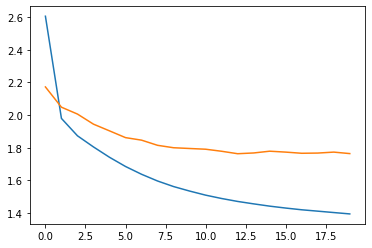

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [39]:
model.save_weights('bodas_sangre_RNN_last_epoch.hdf5')

In [40]:
model = get_model(input_shape = (None, len(chars)))

In [41]:
model.load_weights('bodas_sangre_RNN.hdf5')
# model.load_weights('bodas_sangre_RNN_last_epoch.hdf5')

In [42]:
from RNN_utils import get_deep_rnn, chars_to_one_hot, sample

# Greedy search

In [45]:
input_text = "Estaba la novi"
X_test = chars_to_one_hot(input_text, chars, chars_to_indices, len(input_text))
predictions = model.predict(X_test)
predictions.shape

(1, 14, 71)

In [91]:
X_test = chars_to_one_hot(input_text, chars, chars_to_indices, len(input_text))
predictions = model.predict(X_test)
# list(zip(chars, predictions[0, 0]))
predictions[0, 0]

array([9.8595880e-02, 3.0199248e-05, 1.0427042e-01, 6.8795934e-02,
       8.4964113e-06, 4.8878915e-03, 1.1260908e-05, 2.5544982e-06,
       6.1584776e-03, 3.9438528e-06, 1.0866413e-02, 1.0217662e-05,
       1.6925324e-05, 1.9462246e-05, 1.0756789e-04, 9.6491473e-03,
       6.3047875e-05, 2.8765106e-04, 9.9849547e-07, 1.1072064e-02,
       3.3655015e-05, 6.9537168e-07, 1.1933605e-04, 3.2243708e-05,
       8.7827430e-05, 6.1508745e-04, 8.8863820e-04, 8.2765473e-05,
       8.7006856e-03, 1.4671139e-06, 1.1123004e-03, 8.6303953e-05,
       3.5331424e-05, 6.2480380e-05, 3.0463416e-04, 1.6445956e-01,
       2.3901721e-03, 3.0268406e-04, 5.2855780e-06, 1.7089438e-01,
       3.0970645e-05, 2.7385298e-05, 2.3406468e-05, 3.2467008e-02,
       1.3212465e-05, 2.5961384e-01, 5.1184552e-04, 9.1879446e-07,
       2.7843545e-05, 1.3391495e-07, 9.3623057e-06, 8.7610562e-05,
       6.5375261e-06, 8.8957887e-07, 7.5117227e-05, 9.0175627e-06,
       1.0356801e-02, 8.4588956e-03, 1.0370781e-03, 1.9868667e

In [57]:
predictions[0].shape

(14, 71)

In [64]:
def get_predictions(input_text, pred_char_n = -1, verbose = True):
  # Pasar a one hot enconding
  X_test = chars_to_one_hot(input_text, chars, chars_to_indices, len(input_text))
  # Predicción con modelo
  predictions = model.predict(X_test)
  # La distribución de probabilidades de caracteres de la salida pred_char_n
  char_prob = predictions[0, pred_char_n]
  # Indices ordenados de mayor probabilidad a menor
  probs_sorted_indexes = np.argsort(char_prob)[::-1] 
  if verbose:
    # Imprime texto original hasta caracter
    print(input_text[:pred_char_n+1])
    # Imprime tuplas de caracter, probabilidad
    print([(indices_to_chars[i], predictions[0][pred_char_n][i]) for i in probs_sorted_indexes[:5]])  
  return indices_to_chars[probs_sorted_indexes[0]]

In [65]:
input_text = "Estaba la novi"
# input_text = "Estaba el novi"
# input_text = "los caballo"
# input_text = "el caballo"
get_predictions(input_text, pred_char_n=3)

Esta
[(' ', 0.52335507), ('s', 0.20410538), ('n', 0.061486483), ('l', 0.06006165), ('r', 0.026716223)]


' '

In [98]:
t = 'NOVIO'
# t = 'NOVIA'
for i in range(200):
  t = t + get_predictions(t,len(t)-1, verbose=False)
  #print(t)
print(t)

NOVIO: (Alegre) ¿Te hay que se sire esta fuerte. (A la novia) ¿Te qué? ¿Qué es está?

NOVIO: ¿Qué es está?

NOVIO: ¿Qué es está?

NOVIO: ¿Qué es está?

NOVIO: ¿Qué es está?

NOVIO: ¿Qué es está?

NOVIO: ¿Q


# Sampling model

In [121]:
def sample(a, temperature=1.0, epsilon=1e-10):
    a = np.log(np.array(a) + epsilon)
    a = a*(1/temperature)
    sample_temp = np.exp(a)/(np.exp(a).sum() + epsilon)
    if sample_temp.sum() == 0:
        return np.argmax(a)
    else:
        sample_temp = sample_temp/sample_temp.sum()
    # sample_temp contiene la nueva distribución luego de modificar la temperatura
    choices = range(len(a)) 
    # Elejir un caracter en función de la distribución sample_temp
    sampled_output = np.random.choice(choices, p=sample_temp)
    return sampled_output

In [122]:
def sample_model(input_text, model=model, chars=chars, chars_to_indices=chars_to_indices, t=1.0):
    X_test = chars_to_one_hot(input_text, chars, chars_to_indices, len(input_text))
    # Predicción con modelo
    p = model.predict(X_test)[0][-1]
    # Sampleo de distribución p
    sampled_dist = sample(p, temperature=t, epsilon=1e-10)
    return indices_to_chars[sampled_dist]

In [123]:
input_text = 'Estaba el novi'
for i in range(100):
  print(sample_model(input_text, t=1), end=' ')

a o o n o o o o o o o a o o o o o o o o a o o o o o o o o o r a o o o o o o a o o o a a o o o o o o o o o o o o a o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o 

In [124]:
t = 'NOVIO'
t = 'NOVIA'
for i in range(100):
  t = t + sample_model(t, t=0.1)
  # print(t)
print(t)

NOVIA: (Seria) No lo viste esta la novia. Estoy despierte la novia.
MUCHACHA 1: (Entrando) ¡Ah! (Entrando
